In [ ]:
### https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
!nvidia-smi

Sat Feb 11 14:48:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from keras.datasets import cifar10

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
# normalise data -> make the numbers smaller for better results

import numpy as np

x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

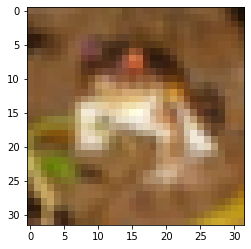

In [32]:
# Generate more traning data with change of pixels, zoom, etc.
# mode.fit_generator needed to fit the model with the gen.flow(x_train, y_train)

from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(width_shift_range=3, height_shift_range=3, zoom_range=0.1, horizontal_flip=True)
# Visualize modified images
for batch in gen.flow(x_train, y_train, shuffle=False):
  # print(batch[0].shape)
  # print(batch[1])

  first_image = batch[0][0]
  plt.imshow(first_image)
  plt.show()
  break;

[1]


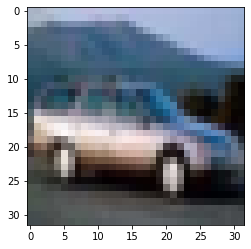

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[4])
plt.imshow(x_train[4])
plt.show()

In [7]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu", padding="same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [33]:
# get true if car else false
y_train = y_train == 1

# Generate more traning data with change of pixels, zoom, etc.
from keras.preprocessing.image import ImageDataGenerator
import math

gen = ImageDataGenerator(width_shift_range=3, height_shift_range=3, zoom_range=0.1, horizontal_flip=True)

model.fit_generator(gen.flow(x_train, y_train, batch_size=128, shuffle=True), steps_per_epoch=math.ceil(len(x_train)/128), epochs=10, workers=8)

<ipython-input-33-572c0e35c2d0>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(gen.flow(x_train, y_train, batch_size=128, shuffle=True), steps_per_epoch=math.ceil(len(x_train)/128), epochs=10, workers=8)


Epoch 1/10
391/391 [==============================] - 45s 113ms/step - loss: 0.1309 - accuracy: 0.9510
Epoch 2/10
391/391 [==============================] - 45s 113ms/step - loss: 0.1147 - accuracy: 0.9586
Epoch 3/10
391/391 [==============================] - 44s 110ms/step - loss: 0.0999 - accuracy: 0.9647
Epoch 4/10
391/391 [==============================] - 44s 111ms/step - loss: 0.0876 - accuracy: 0.9695
Epoch 5/10
391/391 [==============================] - 44s 111ms/step - loss: 0.0837 - accuracy: 0.9707
Epoch 6/10
391/391 [==============================] - 44s 110ms/step - loss: 0.0785 - accuracy: 0.9729
Epoch 7/10
391/391 [==============================] - 44s 112ms/step - loss: 0.0718 - accuracy: 0.9751
Epoch 8/10
391/391 [==============================] - 44s 110ms/step - loss: 0.0682 - accuracy: 0.9759
Epoch 9/10
391/391 [==============================] - 44s 111ms/step - loss: 0.0645 - accuracy: 0.9782
Epoch 10/10
391/391 [==============================] - 45s 113ms/step - l

In [34]:
model.evaluate(x_train, y_train)

1563/1563 [==============================] - 8s 5ms/step - loss: 0.0404 - accuracy: 0.9863


[0.04035362973809242, 0.9863399863243103]

In [35]:
# get true if car else false
y_test = y_test == 1

model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0513 - accuracy: 0.9828


[0.05126351863145828, 0.9828000068664551]

[ True]


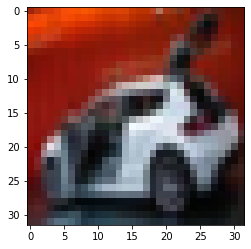

In [14]:
print(y_test[6])
plt.imshow(x_test[6])
plt.show()

In [36]:
p = x_test[6].reshape(1,32,32,3)
p.shape

(1, 32, 32, 3)

In [37]:
model.predict(p)

1/1 [==============================] - 0s 123ms/step


array([[0.99900657]], dtype=float32)